# WEATHER data from Warsaw station

In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import numpy as np

from tensorflow import keras


# Read the CSV file
all_data = pd.read_csv("combined_2.csv", delimiter=';')
all_data.head()

C:\Users\AWeg\AppData\Local\Temp\ipykernel_13260\3255726824.py:13: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv("combined_2.csv", delimiter=';')


,station,valid,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPRZ,01.01.2015 00:30,22.0200,50.1114,-4.0,79.62,13.80,1,1,2015,0,30
1,EPWR,01.01.2015 00:30,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,0,30
2,EPWR,01.01.2015 01:00,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,1,0
3,EPRZ,01.01.2015 01:00,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,0
4,EPWA,01.01.2015 01:00,20.9611,52.1628,1.0,93.03,6.90,1,1,2015,1,0


In [2]:
import warnings
warnings.filterwarnings("ignore") #:D

In [3]:
#remove unnecesseary columns
filtered = all_data[['station','lon', 'lat', 'tmpc', 'relh', 'sped', 'day', 'month', 'year', 'hour', 'minutes']]
filtered = filtered[2:].reset_index(drop=True)
filtered.head(20)

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1.0,93.03,6.90,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4.0,100.0,9.20,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4.0,93.19,9.20,1,1,2015,1,30
5,EPRZ,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,30
6,EPWA,20.9611,52.1628,1.0,100.0,6.90,1,1,2015,1,30
7,EPWR,16.8858,51.1027,2.0,93.08,8.05,1,1,2015,1,30
8,EPWR,16.8858,51.1027,3.0,86.69,9.20,1,1,2015,2,0
9,EPWA,20.9611,52.1628,1.0,100.0,6.90,1,1,2015,2,0


### Note - columns:

lon - longtitiude

lat - latitude

tmpc - temperature in Celsius

relh - relative humidity

sped - wind speed mph (will be converted to meters per second)

day - day of the month

month - month of the year

year - year

time - hour of the day



In [4]:
df=filtered.replace('M', np.nan)

nan_count = df.isna().sum()

print(nan_count)

station      0
lon          0
lat          0
tmpc         0
relh       336
sped         0
day          0
month        0
year         0
hour         0
minutes      0
dtype: int64


In [5]:
# 'tmpf' NaN into data from previous timestamp
bool_df = df['relh'].isnull()
indexes = df[bool_df].index
for i in indexes:
    df['relh'][i]=df['relh'][i-1]

nan_count = df.isna().sum()

print(nan_count)

station    0
lon        0
lat        0
tmpc       0
relh       0
sped       0
day        0
month      0
year       0
hour       0
minutes    0
dtype: int64


In [6]:
#typesetting + sped conversion

df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)
df['tmpc'] = df['tmpc'].astype(int)
df['relh'] = df['relh'].astype(float)
df['sped'] = df['sped'].astype(float)
df['sped'] = df['sped'].apply(lambda x: x * 1.852) # knots -> kmph
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['hour'] = df['hour'].astype(int)
df['minutes'] = df['minutes'].astype(int)

df.head()

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2,86.59,12.7788,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4,79.62,23.4278,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1,93.03,12.7788,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4,100.00,17.0384,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4,93.19,17.0384,1,1,2015,1,30


### from 2015 to 2021 weather : 2022 for validation

In [7]:
# for learning
df_2015_2021 = df[(df['year'] <= 2021)]
# dates_2015_2021 = dates[df['year'] <= 2021]

# for validation
df_2022 = df[(df['year'] == 2022)]
# dates_2022 = dates[df['year'] == 2022]

df_2015_2021

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2,86.59,12.7788,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4,79.62,23.4278,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1,93.03,12.7788,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4,100.00,17.0384,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4,93.19,17.0384,1,1,2015,1,30
...,...,...,...,...,...,...,...,...,...,...,...
490180,EPWR,16.8858,51.1027,11,93.55,34.0768,31,12,2021,23,0
490181,EPWR,16.8858,51.1027,11,93.55,31.9470,31,12,2021,23,30
490182,EPWA,20.9611,52.1628,10,100.00,27.6874,31,12,2021,23,30
490183,EPRZ,22.0200,50.1114,6,100.00,19.1682,31,12,2021,23,30


In [8]:
df_2015_2021.groupby('station')['station'].count()

station
EPRZ    122610
EPSC    122536
EPWA    122535
EPWR    122504
Name: station, dtype: int64

In [9]:
def generate_dfs(raw: pd.DataFrame, is_x: bool, timedelta):
    dfs=[]
    stations=["EPRZ", "EPSC", "EPWA", "EPWR"]
    #print('start')
    for station in stations:
        wdf=raw[(raw['station']==station) & (raw['minutes']==0)]
        #print(wdf.head())
        if is_x:
            wdf = wdf[:-timedelta]
        else:
            wdf = wdf[timedelta:]
        dfs.append(wdf.copy())
    return pd.concat(dfs).reset_index(drop=True)

In [10]:
x_train_xgb = generate_dfs(df_2015_2021, is_x=True, timedelta=3)
y_train_xgb = generate_dfs(df_2015_2021, is_x=False, timedelta=3)
x_test_xgb = generate_dfs(df_2022, is_x=True, timedelta=3)
y_test_xgb = generate_dfs(df_2022, is_x=False, timedelta=3)
x_train_xgb, y_train_xgb

(       station      lon      lat  tmpc   relh     sped  day  month  year  \
 0         EPRZ  22.0200  50.1114    -4  79.62  23.4278    1      1  2015   
 1         EPRZ  22.0200  50.1114    -4  85.96  23.4278    1      1  2015   
 2         EPRZ  22.0200  50.1114    -3  86.07  19.1682    1      1  2015   
 3         EPRZ  22.0200  50.1114    -3  86.07  21.2980    1      1  2015   
 4         EPRZ  22.0200  50.1114    -3  86.07  21.2980    1      1  2015   
 ...        ...      ...      ...   ...    ...      ...  ...    ...   ...   
 245074    EPWR  16.8858  51.1027    13  66.91  17.0384   31     12  2021   
 245075    EPWR  16.8858  51.1027    12  71.45  14.9086   31     12  2021   
 245076    EPWR  16.8858  51.1027    12  76.50  14.9086   31     12  2021   
 245077    EPWR  16.8858  51.1027    13  66.91  19.1682   31     12  2021   
 245078    EPWR  16.8858  51.1027    13  71.64  23.4278   31     12  2021   
 
         hour  minutes  
 0          1        0  
 1          2        0  

In [11]:
x_train_xgb

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPRZ,22.0200,50.1114,-4,79.62,23.4278,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4,85.96,23.4278,1,1,2015,2,0
2,EPRZ,22.0200,50.1114,-3,86.07,19.1682,1,1,2015,3,0
3,EPRZ,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,4,0
4,EPRZ,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,5,0
...,...,...,...,...,...,...,...,...,...,...,...
245074,EPWR,16.8858,51.1027,13,66.91,17.0384,31,12,2021,16,0
245075,EPWR,16.8858,51.1027,12,71.45,14.9086,31,12,2021,17,0
245076,EPWR,16.8858,51.1027,12,76.50,14.9086,31,12,2021,18,0
245077,EPWR,16.8858,51.1027,13,66.91,19.1682,31,12,2021,19,0


In [12]:
y_train_xgb

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPRZ,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,4,0
1,EPRZ,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,5,0
2,EPRZ,22.0200,50.1114,-2,79.92,21.2980,1,1,2015,6,0
3,EPRZ,22.0200,50.1114,-2,86.18,21.2980,1,1,2015,7,0
4,EPRZ,22.0200,50.1114,-2,92.86,25.5576,1,1,2015,8,0
...,...,...,...,...,...,...,...,...,...,...,...
245074,EPWR,16.8858,51.1027,13,66.91,19.1682,31,12,2021,19,0
245075,EPWR,16.8858,51.1027,13,71.64,23.4278,31,12,2021,20,0
245076,EPWR,16.8858,51.1027,12,81.87,31.9470,31,12,2021,21,0
245077,EPWR,16.8858,51.1027,11,93.55,34.0768,31,12,2021,22,0


# XGBoost model

In [13]:
import xgboost as xgb

In [14]:
y_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
x_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
y_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
x_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])

In [15]:
y_train_xgb

,lon,lat,tmpc,relh,sped,day,month,year,hour
0,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,4
1,22.0200,50.1114,-3,86.07,21.2980,1,1,2015,5
2,22.0200,50.1114,-2,79.92,21.2980,1,1,2015,6
3,22.0200,50.1114,-2,86.18,21.2980,1,1,2015,7
4,22.0200,50.1114,-2,92.86,25.5576,1,1,2015,8
...,...,...,...,...,...,...,...,...,...
245074,16.8858,51.1027,13,66.91,19.1682,31,12,2021,19
245075,16.8858,51.1027,13,71.64,23.4278,31,12,2021,20
245076,16.8858,51.1027,12,81.87,31.9470,31,12,2021,21
245077,16.8858,51.1027,11,93.55,34.0768,31,12,2021,22


In [16]:
reg = xgb.XGBRegressor(
        tree_method="hist",
        n_estimators=200,
        n_jobs=16,
        max_depth=12,
        multi_strategy="multi_output_tree",
        subsample=0.6,
    )
reg.fit(x_train_xgb, y_train_xgb, eval_set=[(x_train_xgb, y_train_xgb)])

[23:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "multi_strategy" } are not used.

[0]	validation_0-rmse:471.33546
[1]	validation_0-rmse:329.94481
[2]	validation_0-rmse:230.97439
[3]	validation_0-rmse:161.69988
[4]	validation_0-rmse:113.21300
[5]	validation_0-rmse:79.28041
[6]	validation_0-rmse:55.53906
[7]	validation_0-rmse:38.93601
[8]	validation_0-rmse:27.33664
[9]	validation_0-rmse:19.24785
[10]	validation_0-rmse:13.62810
[11]	validation_0-rmse:9.75150
[12]	validation_0-rmse:7.11207
[13]	validation_0-rmse:5.35565
[14]	validation_0-rmse:4.22926
[15]	validation_0-rmse:3.53638
[16]	validation_0-rmse:3.13881
[17]	validation_0-rmse:2.91257
[18]	validation_0-rmse:2.78319
[19]	validation_0-rmse:2.71800
[20]	validation_0-rmse:2.66934
[21]	validation_0-rmse:2.63182
[22]	validation_0-rmse:2.59837
[23]	validation_0-rmse:2.57538
[24]	validation_0-rmse:2.55475
[25]	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy='multi_output_tree', n_estimators=200, n_jobs=16,
             num_parallel_tree=None, predictor=None, ...)

In [17]:
import pickle
## save as binary file .pkl
file_name = "xgb" + str(3) + ".pkl"
with open(file_name, "xb") as f_1:
    pickle.dump(reg, f_1, -1)

In [18]:
y_pred_xgb = reg.predict(x_test_xgb)
reg.predict(x_test_xgb[:1]), y_test_xgb[:1]

(array([[2.2019997e+01, 5.0111401e+01, 5.5958257e+00, 9.2791344e+01,
         1.8416468e+01, 1.0000353e+00, 1.0000024e+00, 2.0209999e+03,
         3.2664609e+00]], dtype=float32),
      lon      lat  tmpc  relh     sped  day  month  year  hour
 0  22.02  50.1114    10  93.5  29.8172    1      1  2022     3)

In [19]:
reg.score(X=y_pred_xgb, y=y_test_xgb)

0.5100439707360506

In [20]:
y_pred_xgb = pd.DataFrame(y_pred_xgb, columns=[ "lon", "lat",  "tmpc",  "relh" ,"sped" ,"day","month", "year", "hour"])
y_pred_xgb

,lon,lat,tmpc,relh,sped,day,month,year,hour
0,22.019997,50.111401,5.595826,92.791344,18.416468,1.000035,1.000002,2020.999878,3.266461
1,22.019997,50.111401,4.583357,94.393852,19.009172,1.000036,1.000002,2020.999878,4.016664
2,22.019997,50.111401,4.605622,93.307449,33.253216,1.000040,1.000002,2020.999878,4.840128
3,22.019997,50.111401,5.007027,83.539886,39.523212,1.000049,1.000002,2020.999878,5.815763
4,22.019997,50.111401,5.920504,86.313362,26.646778,1.000049,1.000002,2020.999878,6.963565
...,...,...,...,...,...,...,...,...,...
34906,16.885799,51.102695,6.288101,91.331161,12.537280,29.999981,11.999993,2020.999878,19.005783
34907,16.885799,51.102695,3.500764,81.739410,19.564707,30.000046,11.999993,2020.999878,19.994780
34908,16.885799,51.102695,2.724716,90.183113,21.816647,30.000046,11.999993,2020.999878,20.988626
34909,16.885799,51.102695,4.120570,88.557022,26.397821,30.000380,11.999993,2020.999878,21.996170


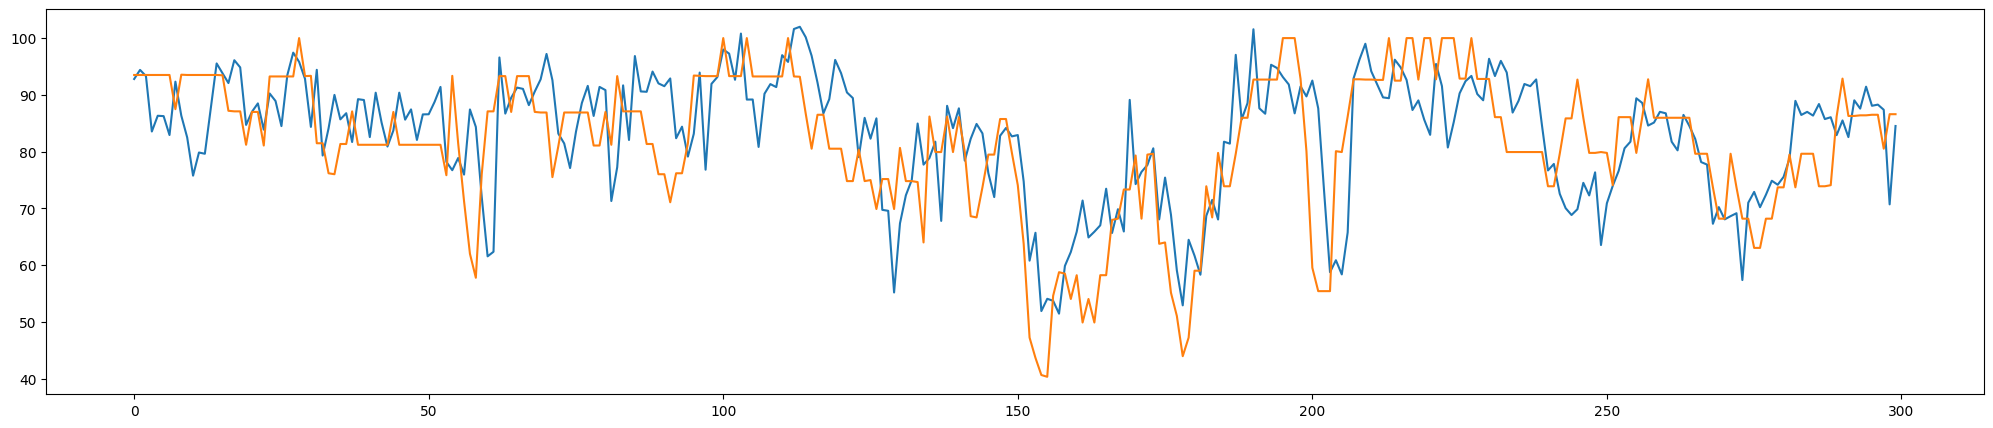

In [21]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["relh"]][:300])
plt.plot(y_test_xgb[["relh"]][:300]) 

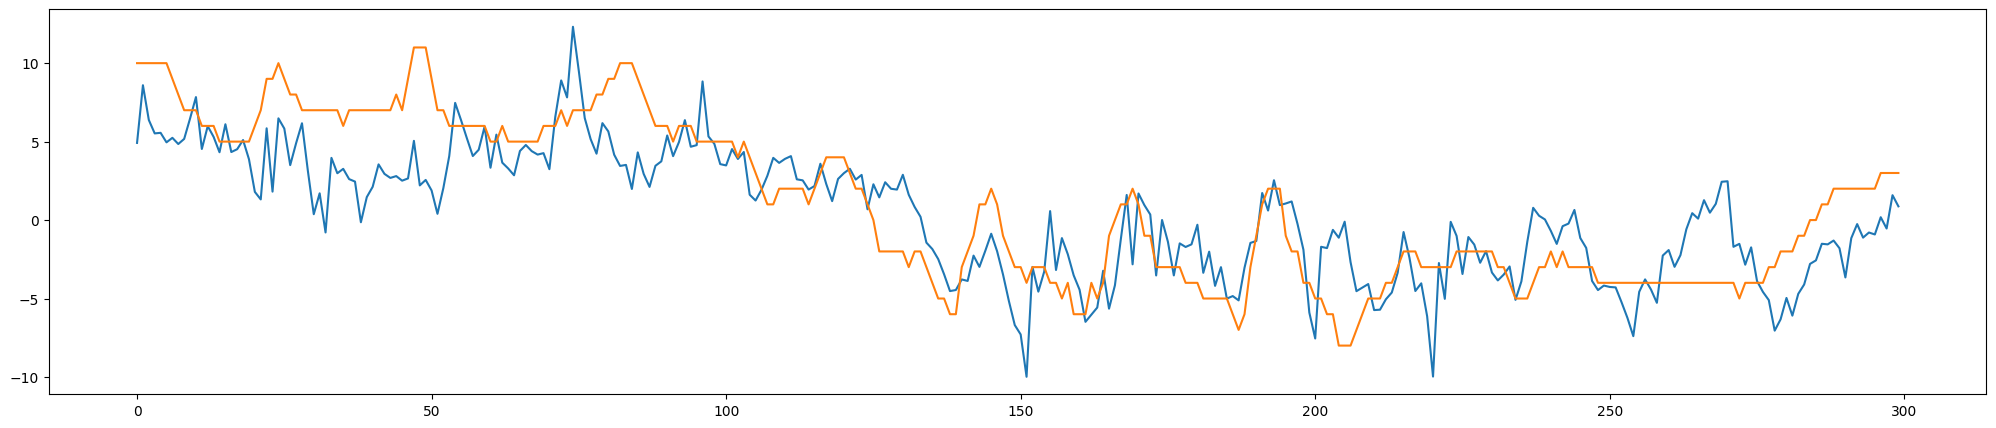

In [30]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["tmpc"]][:300])
plt.plot(y_test_xgb[["tmpc"]][:300]) 

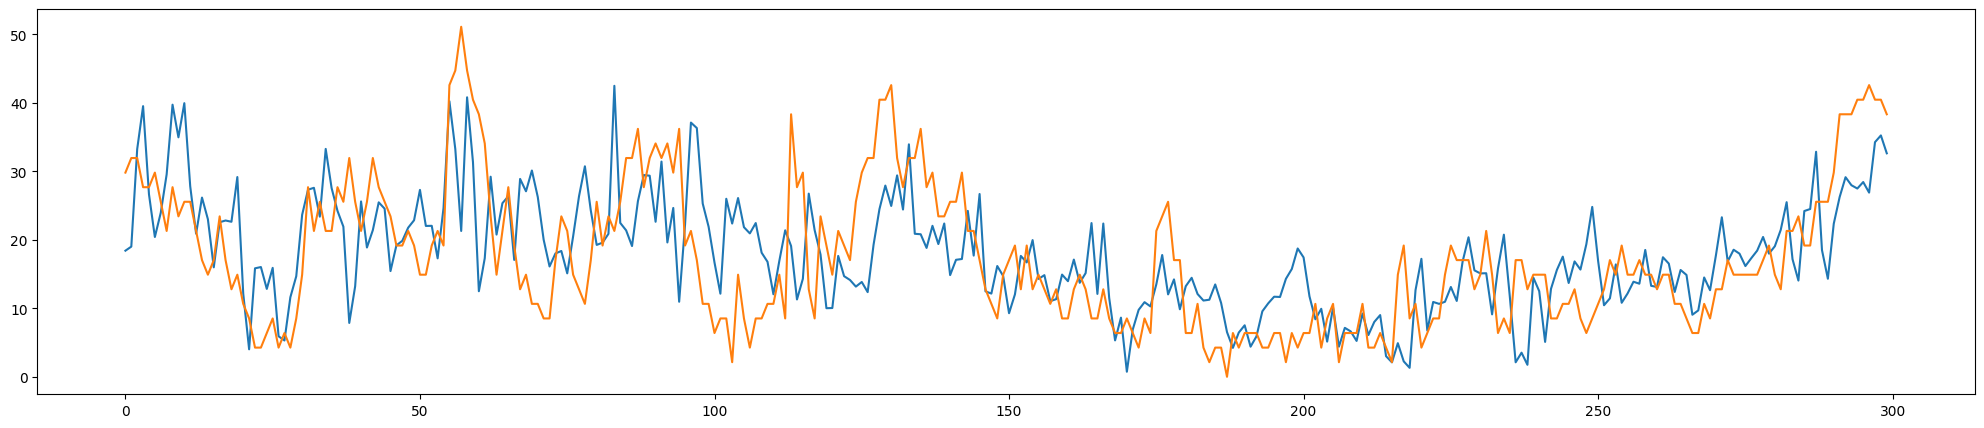

In [23]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["sped"]][:300])
plt.plot(y_test_xgb[["sped"]][:300]) 

# MAE

In [24]:
y_test_xgb.size

314199

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred_xgb[["tmpc"]],y_test_xgb[["tmpc"]]) 

1.4236343526912763

In [26]:
mean_absolute_error(y_pred_xgb[["sped"]],y_test_xgb[["sped"]]) 

5.537259271163489

In [27]:
mean_absolute_error(y_pred_xgb[["relh"]],y_test_xgb[["relh"]]) 

7.780449124556666

# Predictions for 12 hours - if last_pred_hour = 3 and uncommented .pickle save => all models are being saved

In [63]:
last_pred_hour = 12


MAE_humid = []
MAE_wind = []
MAE_temp = []

bias_relh = []
bias_sped = []
bias_temp = []

for hour in range(1,last_pred_hour+1):
    x_train_xgb = generate_dfs(df_2015_2021, is_x=True, timedelta=hour)
    y_train_xgb = generate_dfs(df_2015_2021, is_x=False, timedelta=hour)
    x_test_xgb = generate_dfs(df_2022, is_x=True, timedelta=hour)
    y_test_xgb = generate_dfs(df_2022, is_x=False, timedelta=hour)

    y_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
    x_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
    y_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
    x_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])

    x_train_xgb, y_train_xgb
    reg = xgb.XGBRegressor(
        tree_method="hist",
        n_estimators=200,
        n_jobs=16,
        max_depth=12,
        multi_strategy="multi_output_tree",
        subsample=0.6,
    )
    
    reg.fit(x_train_xgb, y_train_xgb, eval_set=[(x_train_xgb, y_train_xgb)])

    # file_name = "xgb" + str(hour) + ".pkl"
    # with open(file_name, "xb") as f_1:
    #     pickle.dump(reg, f_1, -1)

    y_pred_xgb = reg.predict(x_test_xgb)
    y_pred_xgb = pd.DataFrame(y_pred_xgb, columns=[ "lon", "lat",  "tmpc",  "relh" ,"sped" ,"day","month", "year", "hour"])
    MAE_humid.append(mean_absolute_error(y_pred_xgb[["relh"]],y_test_xgb[["relh"]]))
    MAE_wind.append(mean_absolute_error(y_pred_xgb[["sped"]],y_test_xgb[["sped"]]))
    MAE_temp.append(mean_absolute_error(y_pred_xgb[["tmpc"]],y_test_xgb[["tmpc"]]))


    bias_relh.append(sum((y_pred_xgb[["relh"]].values - y_test_xgb[["relh"]].values)/len(y_test_xgb))[0])
    bias_sped.append(sum((y_pred_xgb[["sped"]].values - y_test_xgb[["sped"]].values)/len(y_test_xgb))[0])
    bias_temp.append(sum((y_pred_xgb[["tmpc"]].values - y_test_xgb[["tmpc"]].values)/len(y_test_xgb))[0])


[08:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "multi_strategy" } are not used.

[0]	validation_0-rmse:471.33190
[1]	validation_0-rmse:329.93768
[2]	validation_0-rmse:230.96320
[3]	validation_0-rmse:161.68360
[4]	validation_0-rmse:113.19029
[5]	validation_0-rmse:79.24918
[6]	validation_0-rmse:55.49647
[7]	validation_0-rmse:38.87791
[8]	validation_0-rmse:27.25644
[9]	validation_0-rmse:19.13802
[10]	validation_0-rmse:13.47820
[11]	validation_0-rmse:9.54838
[12]	validation_0-rmse:6.84075
[13]	validation_0-rmse:5.00270
[14]	validation_0-rmse:3.78563
[15]	validation_0-rmse:3.01186
[16]	validation_0-rmse:2.54089
[17]	validation_0-rmse:2.27307
[18]	validation_0-rmse:2.12481
[19]	validation_0-rmse:2.03954
[20]	validation_0-rmse:1.99359
[21]	validation_0-rmse:1.96497
[22]	validation_0-rmse:1.94924
[23]	validation_0-rmse:1.93809
[24]	validation_0-rmse:1.92284
[25]	validation

In [29]:
# MSE errors for predictions for next hour, two next hours, ... , twelve next hours
print(MAE_humid)
print(MAE_wind)
print(MAE_temp)

[5.020108532988741, 6.658708725379836, 7.780449124556666, 8.685246953318105, 9.295697837397658, 9.863679906820554, 10.277917476074114, 10.753064301146306, 10.95754213071414, 11.337294528291807, 11.47319018629365, 11.703064009262688]
[4.138158768112686, 4.987985149936752, 5.537259271163489, 5.872113890330615, 6.271080114328439, 6.511540233528235, 6.807353040280363, 6.991802818042869, 7.128252907330046, 7.252097440248891, 7.402589008193989, 7.420985748147201]
[0.8313818293244372, 1.1724432589801994, 1.4236343526912763, 1.6501118754944768, 1.8279231514711047, 2.0247497518622923, 2.1658941274264625, 2.280231832723974, 2.3868498389395687, 2.493754858974916, 2.5707294188262733, 2.63504234817103]


In [31]:
# relh	 skph 	temp
data = pd.DataFrame()
data['humid'] = MAE_humid
data['wind'] = MAE_wind
data['temp'] = MAE_temp

In [32]:
data

,humid,wind,temp
0,5.020109,4.138159,0.831382
1,6.658709,4.987985,1.172443
2,7.780449,5.537259,1.423634
3,8.685247,5.872114,1.650112
4,9.295698,6.271080,1.827923
5,9.863680,6.511540,2.024750
6,10.277917,6.807353,2.165894
7,10.753064,6.991803,2.280232
8,10.957542,7.128253,2.386850
9,11.337295,7.252097,2.493755


## Bias only for three  hours here

In [64]:
# for each hour
print(bias_relh)
print(bias_sped)
print(bias_temp)

[0.8413611346518258, 1.2663457369202653, 1.7000585226845983]
[-0.07905352213415735, -0.12746308820709734, -0.18337548458671163]
[-0.13564183067945784, -0.21595076005640934, -0.2472653140182221]


In [65]:
# relh	 skph 	temp
biases = pd.DataFrame()
biases['humid'] = bias_relh
biases['wind'] = bias_sped
biases['temp'] = bias_temp

In [67]:
biases

,humid,wind,temp
0,0.841361,-0.079054,-0.135642
1,1.266346,-0.127463,-0.215951
2,1.700059,-0.183375,-0.247265


In [66]:
biases.to_csv("biases_xgboost")